In [42]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import nbformat

pd.options.display.float_format = '{:,.2f}'.format

# Create pandas DataFrames From portfolio

In [22]:
df = pd.read_excel("Bank loan portfolio.xlsx", sheet_name='Sheet1')  

df

,Position Id,Counterparty Id,Customer Name,Rating Class,Stage,Currency,Days Past Due,PD Segment,One Year PD,Lifetime PD,Initial LGD,Accrued Interest,Current Exposure,Suspended interest,Overlay,ECL final after all edit,ECL Coverage Ratio
0,2102028735262023,102028735,شركه نويبا شارم للمشروعات السياحيه,ORR 6,STAGE_2,EGP,0,SME,0.08,0.54,0.00,0.00,"161,020,318.01",NaN,"23,185,978.37","40,411,238.55",0.25
1,2102041322202023,102041322,الهيئه المصريه العامه للبترول ق مشترك,ORR 1,STAGE_1,USD,29,Corporate,0.00,0.00,0.00,0.00,"52,672,242,439.92",NaN,0.00,0.00,0.00
2,2102041322182023,102041322,الهيئه المصريه العامه للبترول ق مشترك,ORR 1,STAGE_1,USD,29,Corporate,0.00,0.00,0.00,0.00,"52,672,242,439.41",NaN,0.00,0.00,0.00
3,2102041322192023,102041322,الهيئه المصريه العامه للبترول ق مشترك,ORR 1,STAGE_1,USD,29,Corporate,0.00,0.00,0.00,0.00,"52,672,242,439.41",NaN,0.00,0.00,0.00
4,910900480012024,109004800,هيئه قناه السويس,ORR 1,STAGE_1,EGP,0,Corporate,0.00,0.00,0.00,0.00,"40,000,000,000.00",NaN,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5282,112401832024,111003298,يونيون فورليزر,ORR 5,STAGE_1,EUR,0,Corporate,0.03,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN
5283,112402332024,111003298,يونيون فورليزر,ORR 5,STAGE_1,EUR,0,Corporate,0.03,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN
5284,112401932024,111003298,يونيون فورليزر,ORR 5,STAGE_1,EUR,0,Corporate,0.03,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN
5285,112402532024,111003298,يونيون فورليزر,ORR 5,STAGE_1,EUR,0,Corporate,0.03,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN


In [23]:
df.dtypes

Position Id                  object
Counterparty Id               int64
Customer Name                object
Rating Class                 object
Stage                        object
Currency                     object
Days Past Due                 int64
PD Segment                   object
One Year PD                 float64
Lifetime PD                 float64
Initial LGD                 float64
Accrued Interest            float64
Current Exposure            float64
Suspended interest          float64
Overlay                     float64
ECL final after all edit    float64
ECL Coverage Ratio          float64
dtype: object

In [24]:
df.describe()

,Counterparty Id,Days Past Due,One Year PD,Lifetime PD,Initial LGD,Accrued Interest,Current Exposure,Suspended interest,Overlay,ECL final after all edit,ECL Coverage Ratio
count,"5,287.00","5,287.00","5,287.00","5,287.00","5,287.00","5,287.00","5,287.00",5.00,"5,287.00","5,287.00","5,194.00"
mean,"107,625,002.76",60.04,0.11,0.13,0.60,0.00,"44,519,506.28","85,618,591.28","72,268.50","682,215.04",0.11
std,"9,431,454.04",238.04,0.26,0.26,0.24,0.30,"1,373,937,386.33","55,723,241.77","531,637.70","13,522,508.11",0.26
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"12,706,815.88",0.00,0.00,0.00
25%,"102,006,696.00",0.00,0.03,0.01,0.65,0.00,"69,246.12","57,462,795.01",0.00,928.11,0.01
50%,"104,002,279.00",0.00,0.03,0.03,0.65,0.00,"426,038.19","79,302,991.72","1,422.42","6,445.32",0.03
75%,"111,002,921.00",0.00,0.05,0.08,0.65,0.00,"2,150,000.00","123,404,465.51","15,867.65","56,631.33",0.05
max,"133,000,095.00","3,136.00",1.00,1.00,1.00,21.70,"52,672,242,439.92","155,215,888.28","23,185,978.37","907,586,864.62",1.00


In [25]:
# Check for missing values

df.isnull().sum()  # This code will output the number of missing values in each column.

Position Id                    0
Counterparty Id                0
Customer Name                  0
Rating Class                   0
Stage                          0
Currency                       0
Days Past Due                  0
PD Segment                     0
One Year PD                    0
Lifetime PD                    0
Initial LGD                    0
Accrued Interest               0
Current Exposure               0
Suspended interest          5282
Overlay                        0
ECL final after all edit       0
ECL Coverage Ratio            93
dtype: int64

In [26]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

# Loop through each column with missing values

In [27]:
'''
# Create a new Excel writer
with pd.ExcelWriter('missing_values.xlsx') as writer:
    # Loop through each column with missing values
    for col in df.columns[df.isnull().any()]:
        # Clean the column name by replacing invalid characters
        cleaned_col = col.replace("/", "_").replace("\\", "_").replace("?", "_").replace("*", "_").replace("[", "_").replace("]", "_") 

        # Filter the DataFrame to get rows with missing values in the current column
        missing_rows = df[df[col].isnull()]

        # Write the filtered DataFrame to a new sheet in the Excel file
        missing_rows.to_excel(writer, sheet_name=f"Missing_{cleaned_col}", index=False)
'''

'\n# Create a new Excel writer\nwith pd.ExcelWriter(\'missing_values.xlsx\') as writer:\n    # Loop through each column with missing values\n    for col in df.columns[df.isnull().any()]:\n        # Clean the column name by replacing invalid characters\n        cleaned_col = col.replace("/", "_").replace("\\", "_").replace("?", "_").replace("*", "_").replace("[", "_").replace("]", "_") \n\n        # Filter the DataFrame to get rows with missing values in the current column\n        missing_rows = df[df[col].isnull()]\n\n        # Write the filtered DataFrame to a new sheet in the Excel file\n        missing_rows.to_excel(writer, sheet_name=f"Missing_{cleaned_col}", index=False)\n'

In [28]:
#df['ECL_Coverage'] = df["Final Impairment"] / df["EAD Amount"]
df

,Position Id,Counterparty Id,Customer Name,Rating Class,Stage,Currency,Days Past Due,PD Segment,One Year PD,Lifetime PD,Initial LGD,Accrued Interest,Current Exposure,Suspended interest,Overlay,ECL final after all edit,ECL Coverage Ratio
0,2102028735262023,102028735,شركه نويبا شارم للمشروعات السياحيه,ORR 6,STAGE_2,EGP,0,SME,0.08,0.54,0.00,0.00,"161,020,318.01",NaN,"23,185,978.37","40,411,238.55",0.25
1,2102041322202023,102041322,الهيئه المصريه العامه للبترول ق مشترك,ORR 1,STAGE_1,USD,29,Corporate,0.00,0.00,0.00,0.00,"52,672,242,439.92",NaN,0.00,0.00,0.00
2,2102041322182023,102041322,الهيئه المصريه العامه للبترول ق مشترك,ORR 1,STAGE_1,USD,29,Corporate,0.00,0.00,0.00,0.00,"52,672,242,439.41",NaN,0.00,0.00,0.00
3,2102041322192023,102041322,الهيئه المصريه العامه للبترول ق مشترك,ORR 1,STAGE_1,USD,29,Corporate,0.00,0.00,0.00,0.00,"52,672,242,439.41",NaN,0.00,0.00,0.00
4,910900480012024,109004800,هيئه قناه السويس,ORR 1,STAGE_1,EGP,0,Corporate,0.00,0.00,0.00,0.00,"40,000,000,000.00",NaN,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5282,112401832024,111003298,يونيون فورليزر,ORR 5,STAGE_1,EUR,0,Corporate,0.03,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN
5283,112402332024,111003298,يونيون فورليزر,ORR 5,STAGE_1,EUR,0,Corporate,0.03,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN
5284,112401932024,111003298,يونيون فورليزر,ORR 5,STAGE_1,EUR,0,Corporate,0.03,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN
5285,112402532024,111003298,يونيون فورليزر,ORR 5,STAGE_1,EUR,0,Corporate,0.03,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN


# EALB (ECL Provision vs. EAD) by ACC ID (( Static Scatter Chart ))

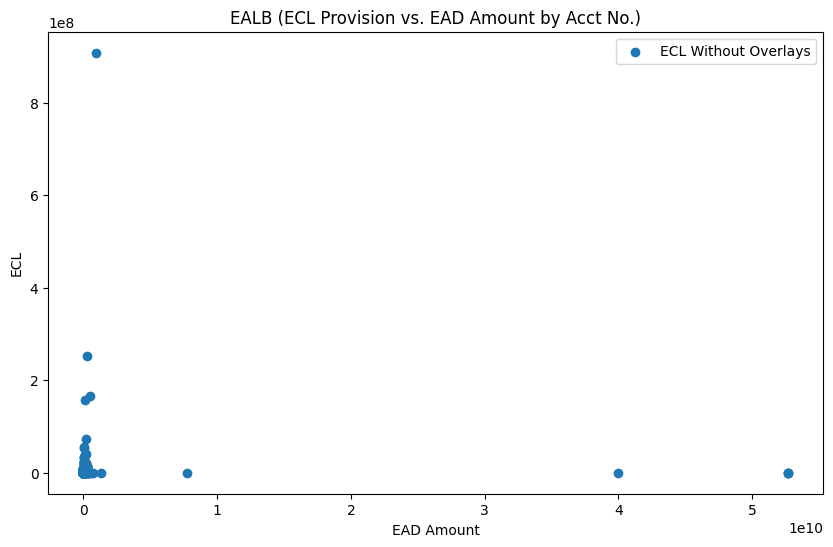

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(df["Current Exposure"], df["ECL final after all edit"], label="ECL Without Overlays")
plt.xlabel('EAD Amount')
plt.ylabel('ECL')
plt.title('EALB (ECL Provision vs. EAD Amount by Acct No.)')
plt.legend()
# plt.savefig("matplotlib_ECL_plot")
plt.show()

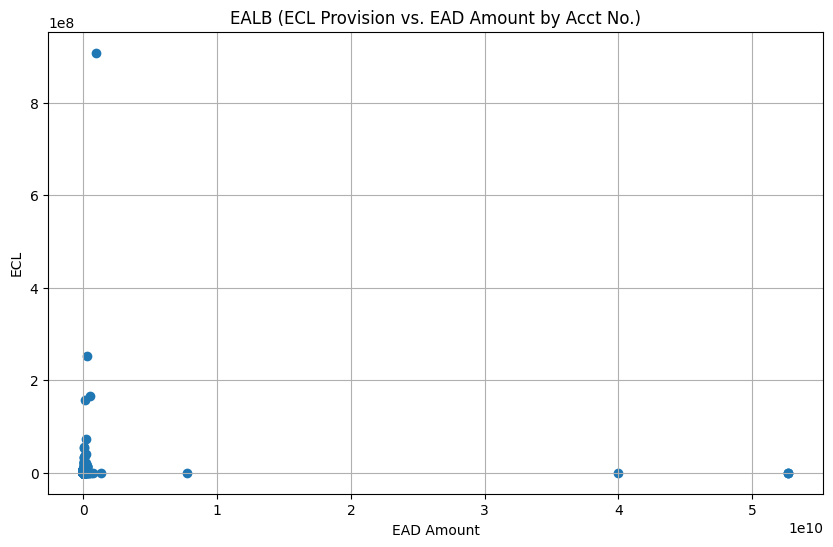

In [30]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(df["Current Exposure"], df["ECL final after all edit"])
plt.title("EALB (ECL Provision vs. EAD Amount by Acct No.)")
plt.xlabel("EAD Amount")
plt.ylabel("ECL")
plt.grid(True)  # Add grid lines (optional)
# plt.savefig("matplotlib_plot.png")  # Save as a PNG image
plt.show() #show the plot in the notebook.

# EALB (ECL Provision vs. EAD) by ACC ID (( Interactive Scatter Chart ))

In [31]:
fig = go.Figure(data=[go.Scatter(
    x=df["Current Exposure"],
    y=df["ECL final after all edit"],
    mode='markers',
    hoverinfo='text',
    hovertext=[f'EAD Amount: {ead:,.0f} | ECL: {imp:,.0f} | ECL Coverage: {cov* 100:.0f}% | ACC ID: {acc_id}' for ead, imp,cov, acc_id in zip(df["Current Exposure"], 
    df["ECL final after all edit"],df["ECL Coverage Ratio "], df["Position Id"])]
    )])


fig.update_layout(title='EALB (ECL Provision vs. EAD Amount) by ACC ID',
                  xaxis_title='EAD Amount',
                  yaxis_title='ECL')

# fig.write_html("EALB (ECL Provision vs. EAD Amount) by ACC ID.html")

fig.show() 

In [32]:
df1=df[df['Stage'] == "STAGE_1"]

fig = go.Figure(data=[go.Scatter(
    x=df1["Current Exposure"],
    y=df1["ECL final after all edit"],
    mode='markers',
    hoverinfo='text',
    hovertext=[f'EAD Amount: {ead:,.0f} | ECL: {imp:,.0f} | ECL Coverage: {cov * 100:.0f}% | ACC ID: {acc_id}' for ead, imp, cov, acc_id in zip(df1["Current Exposure"], 
    df1["ECL final after all edit"], df1["ECL Coverage Ratio "], df1["Position Id"])]
    )])

fig.update_layout(title='EALB (ECL Provision vs. EAD Amount) by ACC ID "stage 1"',
                  xaxis_title='EAD Amount',
                  yaxis_title='ECL')
# fig.write_html("EALB (ECL Provision vs. EAD Amount) by ACC ID S1.html")

fig.show() 

In [33]:
stages = sorted(df['Stage'].unique())  # Get unique stage values
print(stages)

asw0 = np.sum(df["ECL final after all edit"])
as0 =np.sum(df["Current Exposure"])
print(f"{asw0:,.0f}, {as0:,.0f}")

df1=df[df['Stage'] == "STAGE_1"]
asw1 = np.sum(df1["ECL final after all edit"])
as1 =np.sum(df1["Current Exposure"])
print(f"{asw1:,.0f}, {as1:,.0f}")

df2=df[df['Stage'] == "STAGE_2"]
asw2 = np.sum(df2["ECL final after all edit"])
as2 =np.sum(df2["Current Exposure"])
print(f"{asw2:,.0f}, {as2:,.0f}")

df3=df[df['Stage'] == "STAGE_3"]
asw3 = np.sum(df3["ECL final after all edit"])
as3 =np.sum(df3["Current Exposure"])
print(f"{asw3:,.0f}, {as3:,.0f}")

['STAGE_1', 'STAGE_2', 'STAGE_3']
3,606,870,913, 235,374,629,682
504,936,902, 229,466,037,175
1,467,011,618, 3,656,670,662
1,634,922,393, 2,251,921,845


In [34]:
df1=df[df['Stage'] == "STAGE_2"]
df1
fig = go.Figure(data=[go.Scatter(
    x=df1["Current Exposure"],
    y=df1["ECL final after all edit"],
    mode='markers',
    hoverinfo='text',
    hovertext=[f'EAD Amount: {ead:,.0f} | ECL: {imp:,.0f} | ECL Coverage: {cov * 100:.0f}% | ACC ID: {acc_id}' for ead, imp, cov, acc_id in zip(df1["Current Exposure"], 
    df1["ECL final after all edit"], df1["ECL Coverage Ratio "], df1["Position Id"])]
    )])

fig.update_layout(title='EALB (ECL Provision vs. EAD Amount) by ACC ID "stage 2"',
                  xaxis_title='EAD Amount',
                  yaxis_title='ECL')
# fig.write_html("EALB (ECL Provision vs. EAD Amount) by ACC ID S2.html")
asw2 = np.sum(df1["ECL final after all edit"])
as3 =np.sum(df1["Current Exposure"])
print(f"{asw2:,.0f}, {as3:,.0f}")
fig.show() 

1,467,011,618, 3,656,670,662


In [35]:
df1=df[df['Stage'] == "STAGE_3"]
df1
fig = go.Figure(data=[go.Scatter(
    x=df1["Current Exposure"],
    y=df1["ECL final after all edit"],
    mode='markers',
    hoverinfo='text',
    hovertext=[f'EAD Amount: {ead:,.0f} | ECL: {imp:,.0f} | ECL Coverage: {cov * 100:.0f}% | ACC ID: {acc_id}' for ead, imp, cov, acc_id in zip(df1["Current Exposure"], 
    df1["ECL final after all edit"], df1["ECL Coverage Ratio "], df1["Position Id"])]
    )])

fig.update_layout(title='EALB (ECL Provision vs. EAD Amount) by ACC ID "stage 3"',
                  xaxis_title='EAD Amount',
                  yaxis_title='ECL')
# fig.write_html("EALB (ECL Provision vs. EAD Amount) by ACC ID S3.html")
asw2 = np.sum(df1["ECL final after all edit"])
as3 = np.sum(df1["Current Exposure"])
print(f"{asw2:,.0f}, {as3:,.0f}")
fig.show() 

1,634,922,393, 2,251,921,845


In [36]:
stages = sorted(df['Stage'].unique())
print(stages)

# Create a trace for each stage
traces = []
for stage in stages:
    stage_df = df[df['Stage'] == stage]
    trace = go.Scatter(
        x=stage_df["Current Exposure"],
        y=stage_df["ECL final after all edit"],
        mode='markers',
        hoverinfo='text',
        hovertext=[f'EAD Amount: {ead:,.2f}, ECL: {imp:,.2f}, ECL Coverage: {cov * 100:.0f}%, ACC ID: {acc_id}' 
                   for ead, imp, cov, acc_id in zip(stage_df["Current Exposure"], 
                                               stage_df["ECL final after all edit"], 
                                               stage_df["ECL Coverage Ratio "],
                                               stage_df["Position Id"])],
        name=stage,  # Set the trace name to the stage
        visible=True  # Initially show all traces
    )
    traces.append(trace)

figv = go.Figure(data=traces)

# Create the dropdown menu
buttons = [dict(label="All", method="update", args=[{"visible": [True] * len(stages)}])]  # Show all traces

for i, stage in enumerate(stages):
    visibility = [False] * len(stages)
    visibility[i] = True
    buttons.append(dict(label=stage, method="update", args=[{"visible": visibility}]))

figv.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)
figv.write_html("EALB (ECL Provision vs. EAD Amount) by ACC ID SA.html")
figv.show()

['STAGE_1', 'STAGE_2', 'STAGE_3']


# PivotTable By Customer

In [37]:
pivot_table_df = pd.pivot_table(df, index="Counterparty Id",values=["Customer Name","Stage","Current Exposure", "ECL final after all edit"], aggfunc={"Customer Name": np.unique, 'Stage': lambda x: x.iloc[0], 'Current Exposure': np.sum, 'ECL final after all edit': np.sum})

pivot_table_df["ECL Coverage Ratio "] = pivot_table_df["ECL final after all edit"] / pivot_table_df["Current Exposure"]

print(f"EAD S1: {df[df["Stage"] == "STAGE_1"]["Current Exposure"].sum():,.0f}")
print(f"EAD S2: {df[df["Stage"] == "STAGE_2"]["Current Exposure"].sum():,.0f}")
print(f"EAD S3: {df[df["Stage"] == "STAGE_3"]["Current Exposure"].sum():,.0f}")
print(f"ECL S1: {df[df["Stage"] == "STAGE_1"]["ECL final after all edit"].sum():,.0f}")
print(f"ECL S2: {df[df["Stage"] == "STAGE_2"]["ECL final after all edit"].sum():,.0f}")
print(f"ECL S3: {df[df["Stage"] == "STAGE_3"]["ECL final after all edit"].sum():,.0f}")

print(f"ECL S3: {pivot_table_df[pivot_table_df["Stage"] == "STAGE_3"]["ECL final after all edit"].sum():,.0f}")

#print(f"{pivot_table_df['ECL final after all edit'].sum():,.0f}", f"{pivot_table_df['Current Exposure'].sum():,.0f}")

pivot_table_df

EAD S1: 229,466,037,175
EAD S2: 3,656,670,662
EAD S3: 2,251,921,845
ECL S1: 504,936,902
ECL S2: 1,467,011,618
ECL S3: 1,634,922,393
ECL S3: 1,634,922,393


C:\Users\ali19\AppData\Local\Temp\ipykernel_13068\1722204559.py:1: FutureWarning:

The provided callable <function sum at 0x000001F31965A980> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



,Current Exposure,Customer Name,ECL final after all edit,Stage,ECL Coverage Ratio
Counterparty Id,,,,,
0,"6,983,874.12",[احمد محمد امام ( مجموعة العمارة اليوم استشارا...,"6,983,874.12",STAGE_3,1.00
102000102,"9,501,154.04",[شركه سيف للتنميه العقاريه و التجاره],"9,501,154.04",STAGE_3,1.00
102000153,"244,332,310.58",[شركة جي بي للتأجير التمويلي والتخصيم ش.م.م],"697,207.23",STAGE_1,0.00
102000434,"300,243,750.00",[شركة الجمعبة التعاونية للبترول (شركة التعاون ...,"8,710,860.01",STAGE_1,0.03
102000534,"22,972,498.47",[شركه المراكبى للصلب],"712,854.61",STAGE_1,0.03
...,...,...,...,...,...
131000641,"300,074,291.09",[شركة حسن علام للانشاءات],"586,391.30",STAGE_1,0.00
131000681,"50,000.00",[ستاندرز لادارة المشروعات والمنشات],0.00,STAGE_1,0.00
132000496,"2,700,000.00",[جمعية تنميه المجتمع للمشروعات الصغيره والحرفي...,0.00,STAGE_1,0.00


# EALB (ECL Provision vs. EAD) by Customer (( Interactive Scatter Chart ))

In [38]:
stages = sorted(pivot_table_df['Stage'].unique())
print(stages)

# Create a trace for each stage
traces = []
for stage in stages:
    stage_df = pivot_table_df[pivot_table_df['Stage'] == stage]
    trace = go.Scatter(
        x=stage_df["Current Exposure"],
        y=stage_df["ECL final after all edit"],
        mode='markers',
        hoverinfo='text',
        hovertext=[f'EAD Amount: {ead:,.0f} | ECL: {imp:,.0f} | ECL Coverage: {cov * 100:.0f}% | CUST: {acc_id}' 
                   for ead, imp, cov, acc_id in zip(stage_df["Current Exposure"], 
                                               stage_df["ECL final after all edit"], 
                                               stage_df["ECL Coverage Ratio "],
                                               stage_df["Customer Name"])],
        name=stage,  # Set the trace name to the stage
        visible=True  # Initially show all traces
    )
    traces.append(trace)

figv = go.Figure(data=traces)

# Create the dropdown menu
buttons = [dict(label="All", method="update", args=[{"visible": [True] * len(stages)}])]  # Show all traces

for i, stage in enumerate(stages):
    visibility = [False] * len(stages)
    visibility[i] = True
    buttons.append(dict(label=stage, method="update", args=[{"visible": visibility}]))

figv.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)
figv.write_html("EALB (ECL Provision vs. EAD Amount) by CUST ID SA.html")
figv.show()

['STAGE_1', 'STAGE_2', 'STAGE_3']


In [39]:
# Assuming pivot_table_df is your DataFrame

stages = sorted(pivot_table_df['Stage'].unique())
print(stages)

# Create a trace for each stage
traces = []
for stage in stages:
    stage_df = pivot_table_df[pivot_table_df['Stage'] == stage]
    trace = go.Scatter(
        x=stage_df["Current Exposure"],
        y=stage_df["ECL final after all edit"],
        mode='markers',
        hoverinfo='text',
        hovertext=[f'EAD Amount: {ead:,.0f} | ECL: {imp:,.0f} | ECL Coverage: {cov * 100:.0f}% | CUST: {acc_id}'
                   for ead, imp, cov, acc_id in zip(stage_df["Current Exposure"],
                                               stage_df["ECL final after all edit"],
                                               stage_df["ECL Coverage Ratio "],
                                               stage_df["Customer Name"])],
        name=stage,  # Set the trace name to the stage
        visible=True  # Initially show all traces
    )
    traces.append(trace)

    # Calculate linear regression
    x = stage_df["Current Exposure"]
    y = stage_df["ECL final after all edit"]
    if len(x) > 1: # only calculate trendline if there is more than 1 point.
        slope, intercept = np.polyfit(x, y, 1)
        trendline = go.Scatter(
            x=x,
            y=slope * x + intercept,
            mode='lines',
            name=f'{stage} Trendline',
            line=dict(dash='dash'),
            visible=True
        )
        traces.append(trendline)

figv = go.Figure(data=traces)

# Create the dropdown menu
buttons = [dict(label="All", method="update", args=[{"visible": [True] * len(stages * 2)}])]  # Show all traces and trendlines

for i, stage in enumerate(stages):
    visibility = [False] * len(stages * 2)
    visibility[i * 2] = True # show the dots
    visibility[i * 2 +1] = True # show the trendlines
    buttons.append(dict(label=stage, method="update", args=[{"visible": visibility}]))

figv.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)
# figv.write_html("EALB (ECL Provision vs. EAD Amount) by CUST ID Slope.html")
figv.show()

['STAGE_1', 'STAGE_2', 'STAGE_3']


In [40]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import scipy.stats as stats

# Assuming pivot_table_df is your DataFrame

stages = sorted(pivot_table_df['Stage'].unique())
print(stages)

# Create a trace for each stage
traces = []
for stage in stages:
    stage_df = pivot_table_df[pivot_table_df['Stage'] == stage]
    trace = go.Scatter(
        x=stage_df["Current Exposure"],
        y=stage_df["ECL final after all edit"],
        mode='markers',
        hoverinfo='text',
        hovertext=[f'EAD Amount: {ead:,.0f} | ECL: {imp:,.0f} | ECL Coverage: {cov * 100:.0f}% | CUST: {acc_id}'
                   for ead, imp, cov, acc_id in zip(stage_df["Current Exposure"],
                                               stage_df["ECL final after all edit"],
                                               stage_df["ECL Coverage Ratio "],
                                               stage_df["Customer Name"])],
        name=stage,  # Set the trace name to the stage
        visible=True  # Initially show all traces
    )
    traces.append(trace)

    # Calculate linear regression
    x = stage_df["Current Exposure"]
    y = stage_df["ECL final after all edit"]
    if len(x) > 1:  # only calculate trendline if there is more than 1 point.
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        correlation = r_value
        regression_equation = f"y = {slope:.2f}x + {intercept:.2f}"
        correlation_text = f"Correlation: {correlation:.2f}"

        # Add trendline trace
        trendline = go.Scatter(
            x=x,
            y=slope * x + intercept,
            mode='lines',
            name=f'{stage} Trendline',
            line=dict(dash='dash'),
            visible=True
        )
        traces.append(trendline)

        # Add annotation for correlation and regression
        annotation = dict(
            x=0.5,  # Center horizontally
            y=1.15,  # Position at the top
            xref='paper',
            yref='paper',
            showarrow=False,
            text=f'{regression_equation}<br>{correlation_text}',
            font=dict(size=12),
            align='center'
        )
    else:
        annotation = dict(
            x=0.5,  # Center horizontally
            y=1.15,  # Position at the top
            xref='paper',
            yref='paper',
            showarrow=False,
            text=f'Not enough points to calculate regression.',
            font=dict(size=12),
            align='center'
        )

    if 'annotations' not in figv.layout:
        figv = go.Figure(data=traces)
        figv.update_layout(annotations=[annotation])
    else:
        figv.layout.annotations = [annotation]

figv = go.Figure(data=traces)

# Create the dropdown menu
buttons = [dict(label="All", method="update", args=[{"visible": [True if i % 2 == 0 else False for i in range(len(stages * 2))]}])]  # Show only markers for "All"

for i, stage in enumerate(stages):
    visibility = [False] * len(stages * 2)
    visibility[i * 2] = True # show the dots
    visibility[i * 2 +1] = True # show the trendlines
    buttons.append(dict(label=stage, method="update", args=[{"visible": visibility}]))

figv.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)
figv.write_html("EALB (ECL Provision vs. EAD Amount) by CUST ID SA.html")
figv.show()

['STAGE_1', 'STAGE_2', 'STAGE_3']


In [41]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import scipy.stats as stats

# Assuming pivot_table_df is your DataFrame

stages = sorted(pivot_table_df['Stage'].unique())
print(stages)

# Create a trace for each stage
traces = []
for stage in stages:
    stage_df = pivot_table_df[pivot_table_df['Stage'] == stage]
    trace = go.Scatter(
        x=stage_df["Current Exposure"],
        y=stage_df["ECL final after all edit"],
        mode='markers',
        hoverinfo='text',
        hovertext=[f'EAD Amount: {ead:,.0f} | ECL: {imp:,.0f} | ECL Coverage: {cov * 100:.0f}% | CUST: {acc_id}'
                   for ead, imp, cov, acc_id in zip(stage_df["Current Exposure"],
                                               stage_df["ECL final after all edit"],
                                               stage_df["ECL Coverage Ratio "],
                                               stage_df["Customer Name"])],
        name=stage,
        visible=True  # Initially show markers
    )
    traces.append(trace)

    # Calculate linear regression
    x = stage_df["Current Exposure"]
    y = stage_df["ECL final after all edit"]
    if len(x) > 1:
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        correlation = r_value
        regression_equation = f"y = {slope:.2f}x + {intercept:.2f}"
        correlation_text = f"Correlation: {correlation:.2f}"

        # Add trendline trace (initially hidden)
        trendline = go.Scatter(
            x=x,
            y=slope * x + intercept,
            mode='lines',
            name=f'{stage} Trendline',
            line=dict(dash='dash'),
            visible=False  # Initially hide trendlines
        )
        traces.append(trendline)

        # Add annotation for correlation and regression
        annotation = dict(
            x=0.5,
            y=1.15,
            xref='paper',
            yref='paper',
            showarrow=False,
            text=f'{regression_equation}<br>{correlation_text}',
            font=dict(size=12),
            align='center'
        )
    else:
        annotation = dict(
            x=0.5,
            y=1.15,
            xref='paper',
            yref='paper',
            showarrow=False,
            text=f'Not enough points to calculate regression.',
            font=dict(size=12),
            align='center'
        )

    if 'annotations' not in figv.layout:
        figv = go.Figure(data=traces)
        figv.update_layout(annotations=[annotation])
    else:
        figv.layout.annotations = [annotation]

figv = go.Figure(data=traces)

# Create the dropdown menu
# Show only markers for "All"
buttons = [dict(label="All", method="update", args=[{"visible": [True if i % 2 == 0 else False for i in range(len(stages * 2))]}])]  

for i, stage in enumerate(stages):
    visibility = [False] * len(stages * 2)
    visibility[i * 2] = True  # show the dots
    visibility[i * 2 + 1] = True  # show the trendlines
    buttons.append(dict(label=stage, method="update", args=[{"visible": visibility}]))

figv.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)
figv.write_html("EALB (ECL Provision vs. EAD Amount) by CUST ID Slope.html")
figv.show()

['STAGE_1', 'STAGE_2', 'STAGE_3']
